In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Configuração para reprodutibilidade
np.random.seed(42)

In [11]:

# Gerando dias do mês (1 a 30)
dias = np.arange(1, 31)

# Gerando Vendas Normais (Média de 500, variando +/- 50)
vendas = np.random.normal(500, 50, 30).round(2)

# Inserindo um valor fora da curva (Outlier)
vendas[14] = 3500.00  # dia 15 

# Criando o DataFrame
df_vendas = pd.DataFrame({
    'Dia': dias,
    'Vendas': vendas
})
df_vendas.iloc[12:17]

,Dia,Vendas
12,13,482.86
13,14,459.89
14,15,3500.00
15,16,520.20
16,17,594.31


In [12]:
# Revisão pandas
resumo = df_vendas['Vendas'].describe()

media = df_vendas['Vendas'].mean()
mediana = df_vendas['Vendas'].median()
desvio = df_vendas['Vendas'].std()

print(f"Venda Média: R$ {media:.2f}")
print(f"Venda Mediana: R$ {mediana:.2f}") # Metas poderiam ser melhor baseadas nesse valor
print(f"Desvio Padrão: R$ {desvio:.2f}")

Venda Média: R$ 599.26
Venda Mediana: R$ 499.47
Desvio Padrão: R$ 549.74


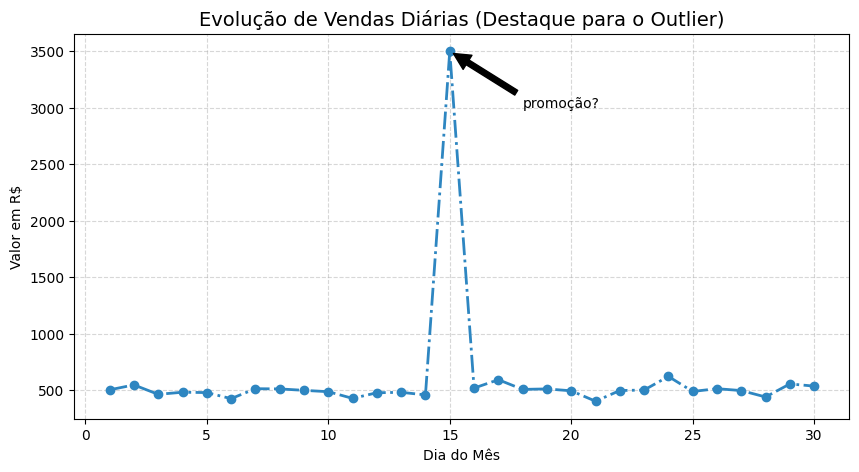

In [ ]:
# O Jeito "Profissional" (Orientado a Objetos)
# Criamos a Figura (fig) e os Eixos (ax) separadamente
fig, ax = plt.subplots(figsize=(10, 5))

# Plot de Linha
ax.plot(df_vendas['Dia'], df_vendas['Vendas'], 
        color='#2E86C1',
        linewidth=2,
        marker='o',         # Bolinha em cada ponto
        linestyle='-.'
       )


ax.set_title('Evolução de Vendas Diárias (Destaque para o Outlier)', fontsize=14)
ax.set_xlabel('Dia do Mês')
ax.set_ylabel('Valor em R$')
ax.grid(True, linestyle='--', alpha=0.5) # Grade suave

# Adicionando uma anotação 
ax.annotate('promoção?', 
            xy=(15, 3500), 
            xytext=(18, 3000),
            )
# arrowprops=dict(facecolor='black', shrink=0.05), alternativa
plt.show()

In [34]:
meta_errada = df_vendas['Vendas'].mean()
meta_justa = df_vendas['Vendas'].median()

In [35]:
df_vendas['Status'] = np.where(df_vendas['Vendas'] >= meta_errada, 'Acima da Meta', 'Abaixo da Meta')

df_vendas['Status'].value_counts()


Status
Abaixo da Meta    28
Acima da Meta      2
Name: count, dtype: int64

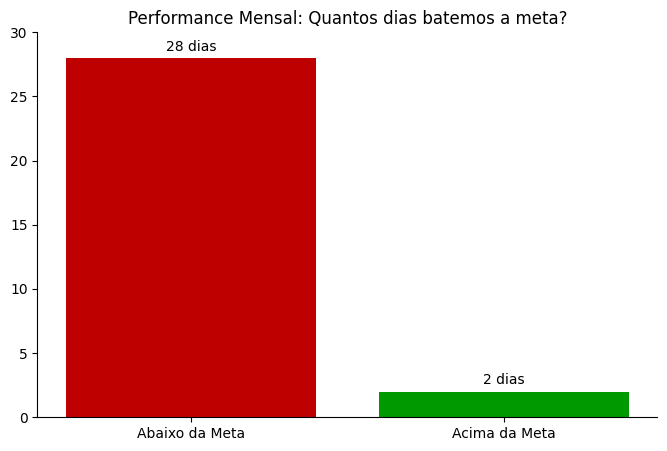

In [53]:
contagem = df_vendas['Status'].value_counts()


fig, ax = plt.subplots(figsize=(8, 5))

barras = ax.bar(contagem.index, contagem.values, color=["#BF0000", "#009A00"],)


ax.bar_label(barras, fmt='%d dias', padding=3)
# ax.set_xticklabels(['acima', 'abaixo'])

ax.set_title('Performance Mensal: Quantos dias batemos a meta?')
ax.set_ylim(0, 30) # espaço no comeco do grafico

ax.spines['top'].set_visible(False) # borda
ax.spines['right'].set_visible(False) # borda

plt.show()

## Exercice: "Vocês receberam os dados de Satisfação do Cliente (0 a 10) de 50 atendimentos."

### * Gere um array numpy com 50 notas aleatórias entre 1 e 10 (np.random.randint). (desafio, gerar também 50 nomes)

### * Calcule a Média e a Mediana das notas.

### * Crie um gráfico de Linha mostrando a variação das notas atendimento a atendimento.

### * Adicione uma Linha Horizontal vermelha no gráfico indicando a Média (ax.axhline).

In [1]:
np.random.seed(1)

NameError: name 'np' is not defined

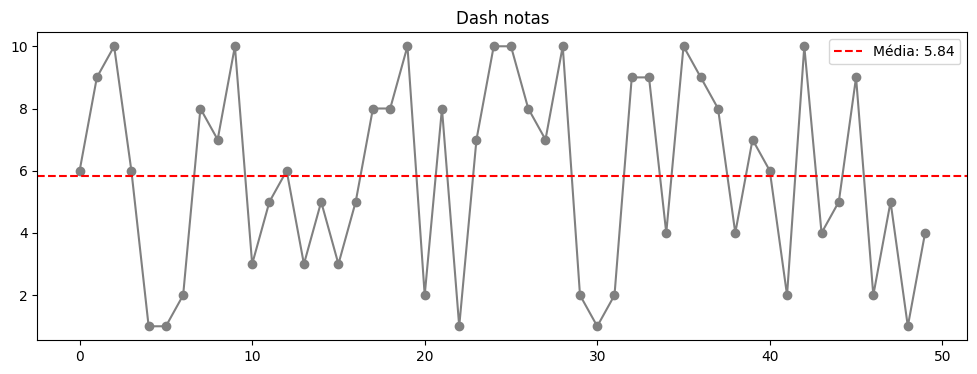